# **[필수 과제2] 시계열 데이터**

- 기존 데이터의 분포와 관계 확인 (시각화)
- 결측값 생성 후 interpolation, iterative imputer 진행
- 결과 비교하기

In [2]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('seattle-weather.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


### 시계열 데이터로 변환

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [7]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### DatetimeIndex 설정

In [8]:
df1 = df.set_index('date')

In [9]:
df1

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


### 결측치 생성 전 데이터 분포, 관계 확인

<ipython-input-63-06c957864b15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

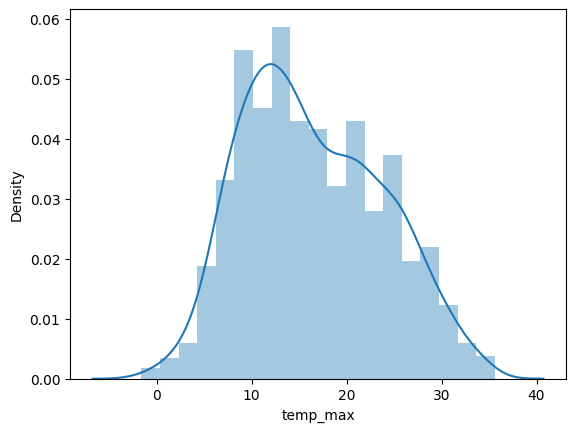

In [63]:
sns.distplot(df1['temp_max'])

<ipython-input-65-038afce85f66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['temp_min'])


<Axes: xlabel='temp_min', ylabel='Density'>

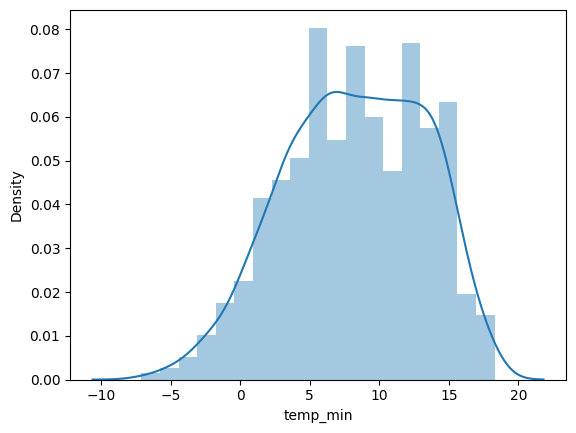

In [65]:
sns.distplot(df1['temp_min'])

<ipython-input-66-9f845a9b7a8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['wind'])


<Axes: xlabel='wind', ylabel='Density'>

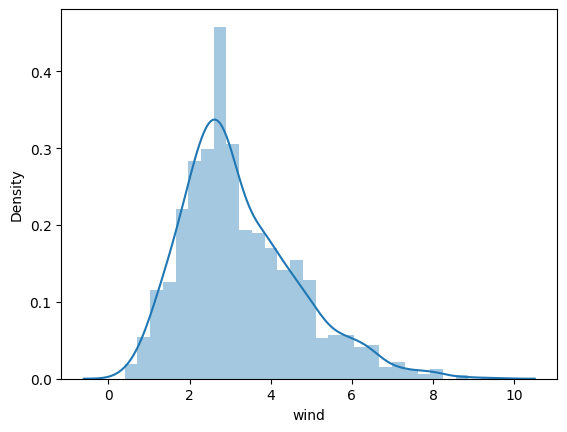

In [66]:
sns.distplot(df1['wind'])

<Axes: xlabel='date'>

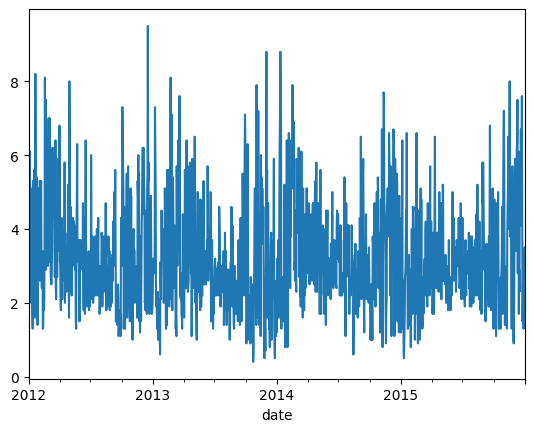

In [10]:
df1['wind'].plot()

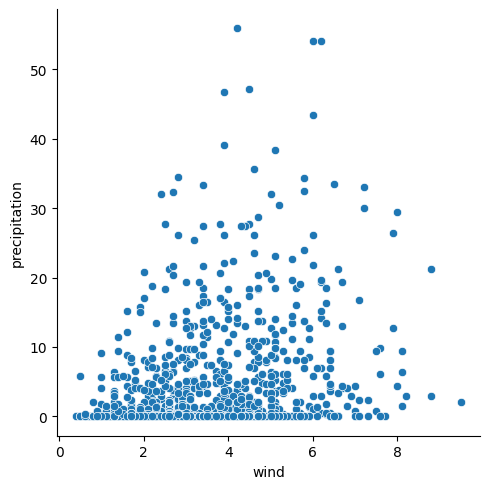

In [11]:
sns.relplot(data=df1, x='wind', y='precipitation')

<Axes: xlabel='temp_max', ylabel='precipitation'>

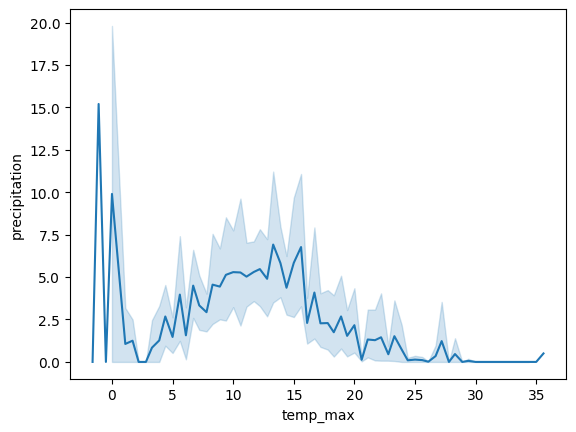

In [12]:
sns.lineplot(data=df1, x='temp_max', y='precipitation')

## 결측치 만들기

####'temp_max':100개, 'temp_min':500개, 'wind':1000개

In [13]:
df_x = df1[['temp_max', 'temp_min', 'wind']]
# df_y = df1['precipitation']

In [14]:
df_x

,temp_max,temp_min,wind
date,,,
2012-01-01,12.8,5.0,4.7
2012-01-02,10.6,2.8,4.5
2012-01-03,11.7,7.2,2.3
2012-01-04,12.2,5.6,4.7
2012-01-05,8.9,2.8,6.1
...,...,...,...
2015-12-27,4.4,1.7,2.9
2015-12-28,5.0,1.7,1.3
2015-12-29,7.2,0.6,2.6


In [15]:
msv_max = np.random.randint(0, 1460, size=100)
msv_min = np.random.randint(0, 1460, size=500)
msv_wind = np.random.randint(0, 1460, size=1000)

In [16]:
df_x['temp_max'].iloc[msv_max] = np.nan
df_x['temp_min'].iloc[msv_min] = np.nan
df_x['wind'].iloc[msv_wind] = np.nan

<ipython-input-16-cd24a098bb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['temp_max'].iloc[msv_max] = np.nan
<ipython-input-16-cd24a098bb2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['temp_min'].iloc[msv_min] = np.nan
<ipython-input-16-cd24a098bb2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['wind'].iloc[msv_wind] = np.nan


In [17]:
df_x.isna().sum()

temp_max     96
temp_min    433
wind        731
dtype: int64

## 1) 평균값으로 대체

In [18]:
# y값과 연결
df_mean = pd.concat([df_x, df1['precipitation']], axis=1)

In [19]:
df_mean

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,NaN,NaN,10.9
2012-01-03,11.7,7.2,NaN,0.8
2012-01-04,12.2,NaN,4.7,20.3
2012-01-05,8.9,2.8,NaN,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,NaN,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,2.6,0.0


<Axes: xlabel='date'>

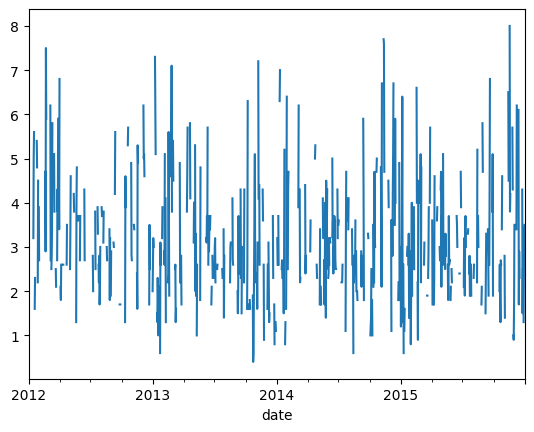

In [20]:
df_mean['wind'].plot()

결측치 대체 전에는 그래프가 끊기는 것 확인 가능

In [21]:
df_mean['temp_max'] = df_mean['temp_max'].fillna(df_mean['temp_max'].mean())
df_mean['temp_min'] = df_mean['temp_min'].fillna(df_mean['temp_min'].mean())
df_mean['wind'] = df_mean['wind'].fillna(df_mean['wind'].mean())

In [22]:
df_mean.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

### 데이터 분할 7 : 3 ('2014-10-17' 기준으로 분할)

In [23]:
X_mean = df_mean.drop('precipitation', axis=1)
y_mean = df_mean['precipitation']

In [24]:
split_date = pd.to_datetime('2014-10-17')

In [25]:
X_train = X_mean.loc[:split_date]
X_test = X_mean.loc[split_date:]
y_train = y_mean.loc[:split_date]
y_test = y_mean.loc[split_date:]

In [26]:
X_train.shape, y_train.shape

((1021, 3), (1021,))

In [27]:
X_test.shape, y_test.shape

((441, 3), (441,))

In [28]:
# 회귀분석에 필요한 모듈
import statsmodels.api as sm

In [29]:
# 회귀분석 (다중회귀)
fit_train1 = sm.OLS(y_train, X_train)

In [30]:
fit_train1 = fit_train1.fit()

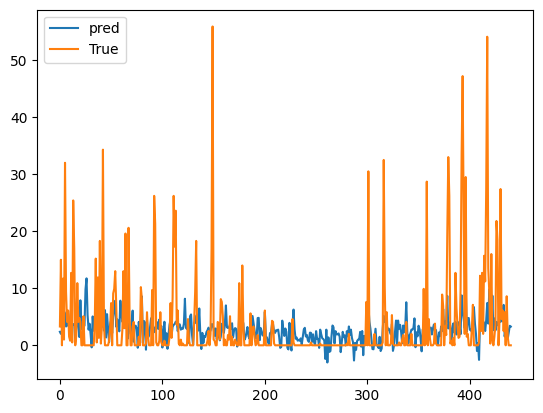

In [31]:
# 예측
plt.plot(np.array(fit_train1.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [32]:
# MSE
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(y_test, fit_train1.predict(X_test))

In [34]:
mse

51.64515536235972

## 2) 보간법으로 대체

In [35]:
# y값과 연결
df_itp = pd.concat([df_x, df1['precipitation']], axis=1)

In [36]:
df_itp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,NaN,NaN,10.9
2012-01-03,11.7,7.2,NaN,0.8
2012-01-04,12.2,NaN,4.7,20.3
2012-01-05,8.9,2.8,NaN,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,NaN,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,2.6,0.0


In [37]:
df_itp['temp_max'] = df_itp['temp_max'].interpolate(method='linear')
df_itp['temp_min'] = df_itp['temp_min'].interpolate(method='linear')
df_itp['wind'] = df_itp['wind'].interpolate(method='linear')

In [38]:
df_itp.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [39]:
X_itp = df_itp.drop('precipitation', axis=1)
y_itp = df_itp['precipitation']

In [40]:
X_train = X_itp.loc[:split_date]
X_test = X_itp.loc[split_date:]
y_train = y_itp.loc[:split_date]
y_test = y_itp.loc[split_date:]

In [41]:
fit_train2 = sm.OLS(y_train, X_train)

In [42]:
fit_train2 = fit_train2.fit()

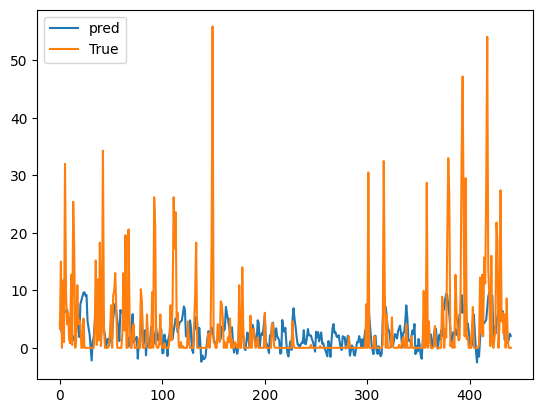

In [43]:
# 예측
plt.plot(np.array(fit_train2.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [44]:
mse2 = mean_squared_error(y_test, fit_train2.predict(X_test))

In [45]:
mse2

50.23093826241945

선형보간으로 진행하니 실제 평균값으로 대체하는 것보다 낮은 mse값 나옴

## 3) iterative imputer로 대체

In [46]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

In [47]:
# y값과 연결
df_imp = pd.concat([df_x, df1['precipitation']], axis=1)

In [48]:
df_imp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,NaN,NaN,10.9
2012-01-03,11.7,7.2,NaN,0.8
2012-01-04,12.2,NaN,4.7,20.3
2012-01-05,8.9,2.8,NaN,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,NaN,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,2.6,0.0


In [49]:
df_imp = imputer.fit_transform(df_imp)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [50]:
# DataFrame으로 변환
df_imp = pd.DataFrame(df_imp)

In [51]:
df_imp

,0,1,2,3
0,12.8,5.000000,4.700000,0.0
1,10.6,5.501912,3.864413,10.9
2,11.7,7.200000,3.516213,0.8
3,12.2,7.735938,4.700000,20.3
4,8.9,2.800000,3.101399,1.3
...,...,...,...,...
1456,4.4,1.700000,3.844473,8.6
1457,5.0,1.700000,1.300000,1.5
1458,7.2,0.600000,2.600000,0.0
1459,5.6,-1.000000,3.400000,0.0


In [52]:
# 시계열로 변환
df_imp['date'] = pd.to_datetime(df['date'])
df_imp.set_index('date', inplace=True)

In [53]:
df_imp.columns = ['temp_max', 'temp_min', 'wind', 'precipitation']

In [54]:
df_imp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.000000,4.700000,0.0
2012-01-02,10.6,5.501912,3.864413,10.9
2012-01-03,11.7,7.200000,3.516213,0.8
2012-01-04,12.2,7.735938,4.700000,20.3
2012-01-05,8.9,2.800000,3.101399,1.3
...,...,...,...,...
2015-12-27,4.4,1.700000,3.844473,8.6
2015-12-28,5.0,1.700000,1.300000,1.5
2015-12-29,7.2,0.600000,2.600000,0.0


In [55]:
X_imp = df_imp.drop('precipitation', axis=1)
y_imp = df_imp['precipitation']

In [56]:
X_train = X_imp.loc[:split_date]
X_test = X_imp.loc[split_date:]
y_train = y_imp.loc[:split_date]
y_test = y_imp.loc[split_date:]

In [57]:
fit_train3 = sm.OLS(y_train, X_train)

In [58]:
fit_train3 = fit_train3.fit()

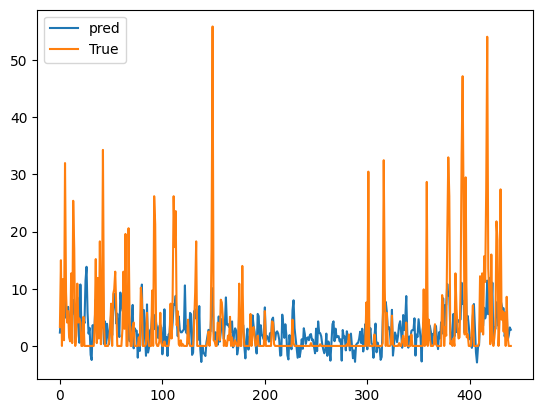

In [59]:
# 예측
plt.plot(np.array(fit_train3.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [60]:
mse3 = mean_squared_error(y_test, fit_train3.predict(X_test))

In [61]:
mse3

41.48097708239738

In [62]:
# 결측치 대체에 어떤 방법이 가장 좋을까..?
print('단순평균대치법 :', mse)
print('선형보간법 :', mse2)
print('iterative imputer :', mse3)

단순평균대치법 : 51.64515536235972
선형보간법 : 50.23093826241945
iterative imputer : 41.48097708239738
